# LOANPREDICT: A DATA-DRIVEN APPROACH TO LOAN APPROVAL

## INSTALLING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## DATA COLLECTION: LOADING DATASET 

In [2]:
# Wrap the file path in raw strings (r'') to avoid interpreting backslashes
df = pd.read_csv(r'C:\Users\amitm\Desktop\LOAN PREDICTION STATUS\Dataset.csv')

## UNDERSTANDING THE DATASET

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### BASICS STATISTICAL DETAILS OF THE DATSET

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### CHECKING COLUMN-WISE NULL VALUES

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().sum()*100 / len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### HANDLING NULL VALUES & MISSING VALUES

In [11]:
df = df.drop('Loan_ID',axis=1)

In [12]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [13]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']
df = df.dropna(subset=columns)

In [14]:
df.isnull().sum()*100 / len(df)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
df['Self_Employed'].mode()[0]

'No'

In [16]:
df['Self_Employed'] =df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df['Credit_History'].mode()[0]

1.0

In [19]:
df['Credit_History'] =df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [20]:
df.isnull().sum()*100 / len(df)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## HANDLING CATOGORICAL COLUMNS 

In [21]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [22]:
df['Dependents'] = df['Dependents'].replace(to_replace="3+", value="4")

In [23]:
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [24]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [25]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Married'] = df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


## EDA

Number of people who took loan by gender
Gender
1    449
0    104
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

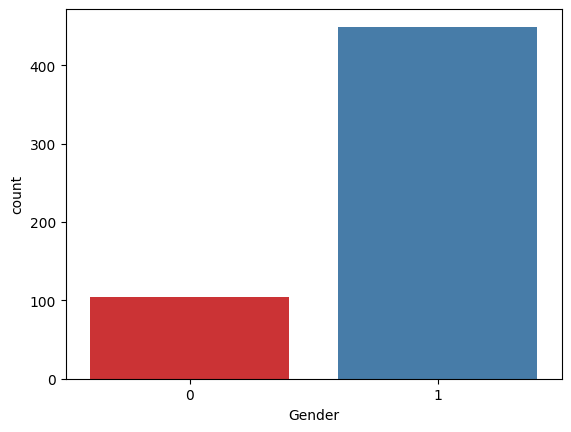

In [27]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')

Number of people who took loan by Married
Married
1    359
0    194
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

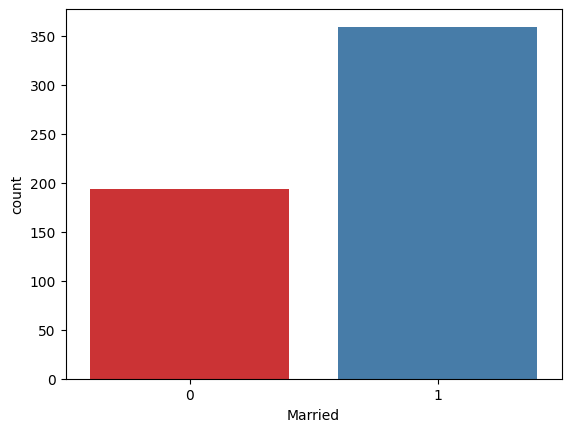

In [28]:
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette='Set1')

Number of people who took loan by Education
Education
1    437
0    116
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

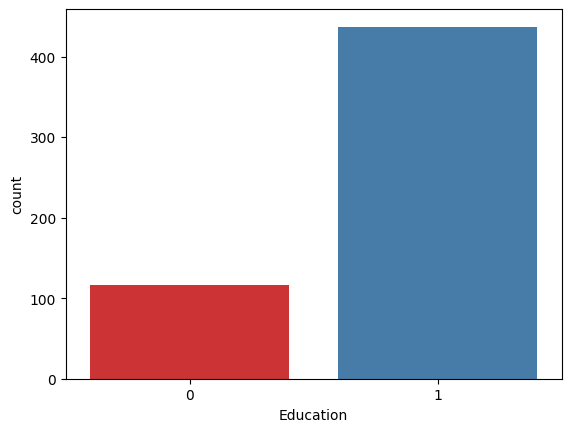

In [29]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set1')

<Axes: >

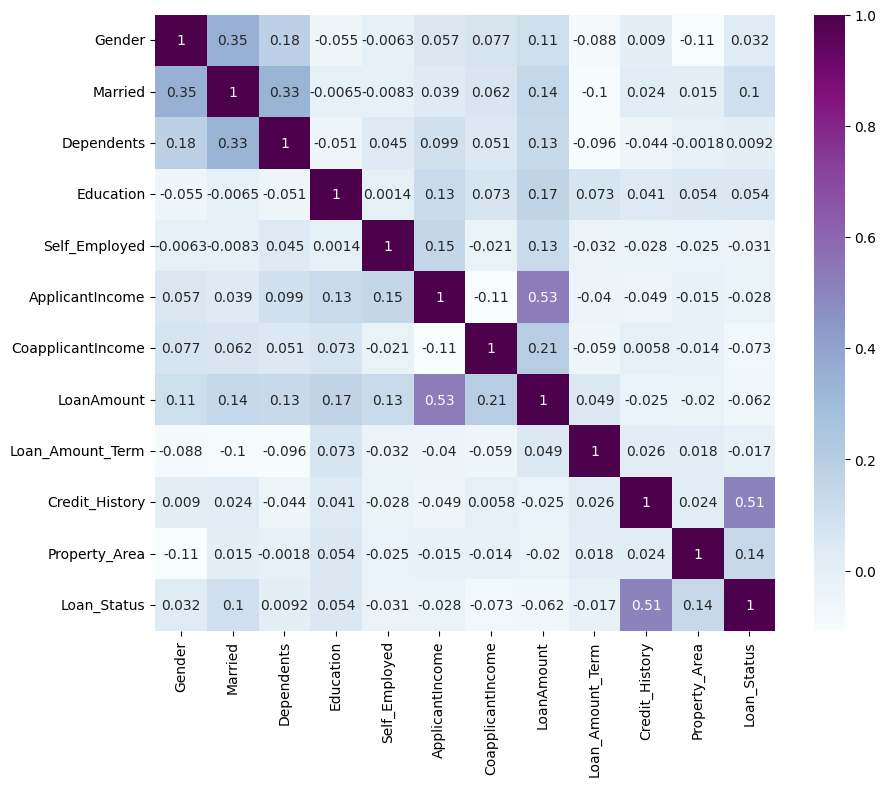

In [30]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

In [31]:
corr = df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.354089,0.184283,-0.054735,-0.006316,0.056625,0.077338,0.105870,-0.088106,0.008956,-0.108286,0.031990
Married,0.354089,1.000000,0.333695,-0.006463,-0.008348,0.038629,0.062473,0.144680,-0.102359,0.023699,0.014957,0.103425
Dependents,0.184283,0.333695,1.000000,-0.050945,0.044865,0.099377,0.050780,0.133378,-0.096142,-0.044444,-0.001839,0.009168
Education,-0.054735,-0.006463,-0.050945,1.000000,0.001360,0.128312,0.073145,0.168784,0.073034,0.041248,0.053574,0.054442
Self_Employed,-0.006316,-0.008348,0.044865,0.001360,1.000000,0.150266,-0.021292,0.126050,-0.032472,-0.028205,-0.024665,-0.031146
ApplicantIncome,0.056625,0.038629,0.099377,0.128312,0.150266,1.000000,-0.107597,0.529728,-0.040014,-0.049439,-0.015359,-0.028482
CoapplicantIncome,0.077338,0.062473,0.050780,0.073145,-0.021292,-0.107597,1.000000,0.205801,-0.059338,0.005814,-0.013817,-0.073415
LoanAmount,0.105870,0.144680,0.133378,0.168784,0.126050,0.529728,0.205801,1.000000,0.049339,-0.025290,-0.020372,-0.062313
Loan_Amount_Term,-0.088106,-0.102359,-0.096142,0.073034,-0.032472,-0.040014,-0.059338,0.049339,1.000000,0.026256,0.017529,-0.017117
Credit_History,0.008956,0.023699,-0.044444,0.041248,-0.028205,-0.049439,0.005814,-0.025290,0.026256,1.000000,0.024194,0.508250


## Store Feature Matrix In X And Response (Target) In Vector y

In [32]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [33]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

### FEATURES SCALING

In [34]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [35]:
import sklearn
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [36]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1


###  Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [38]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [39]:
model_df

{}

### LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


### SUPPORT VECTOR MACHINE

In [41]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


### DECISION TREE CLASSIFIER

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7567567567567568
DecisionTreeClassifier() Avg cross val score is 0.7125307125307125


### RANDOM FOREST CLASSIFIER

In [43]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg cross val score is 0.7848484848484848


### GRADIENT BOOSTER CLASSIFIER

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.7703521703521703


## HYPERPARAMETER TUNING

In [45]:
from sklearn.model_selection import RandomizedSearchCV

### LOGISTICS REGRESSION

In [46]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [47]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [48]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [49]:
rs_log_reg.best_score_

0.8047829647829647

In [50]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

## SVM

In [51]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [52]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [53]:
rs_svc.best_score_

0.8066011466011467

In [54]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

## RANDOM FOREST CLASSIFIER

In [55]:
RandomForestClassifier()
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [56]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [57]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [58]:
rs_rf.best_score_

0.8066175266175266

In [59]:
rs_rf.best_params_

{'n_estimators': 420,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

#### LogisticRegression score Before Hyperparameter Tuning: 80.48
#### LogisticRegression score after Hyperparameter Tuning: 80.48 
    
------------------------------------------------------
#### SVC score Before Hyperparameter Tuning: 79.38
#### SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
#### RandomForestClassifier score Before Hyperparameter Tuning: 77.76
#### RandomForestClassifier score after Hyperparameter Tuning: 80.66 

### SAVING THE MODEL

In [60]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [61]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [62]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

## PREDICTION TIME 

In [63]:
import joblib
joblib.dump(rf,'loan_status_prediction')

['loan_status_prediction']

In [64]:
model = joblib.load('loan_status_prediction')

In [65]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':0,
    'Dependents':0,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':1442,
    'CoapplicantIncome':0.0,
    'LoanAmount':35,
    'Loan_Amount_Term':360,
    'Credit_History':1,
    'Property_Area':1
},index=[0])

In [66]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,1442,0.0,35,360,1,1


In [67]:
result = model.predict(df)

In [68]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved


## GUI

In [69]:
from tkinter import *
import joblib
import pandas as pd

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
        'Gender': [p1],
        'Married': [p2],
        'Dependents': [p3],
        'Education': [p4],
        'Self_Employed': [p5],
        'ApplicantIncome': [p6],
        'CoapplicantIncome': [p7],
        'LoanAmount': [p8],
        'Loan_Amount_Term': [p9],
        'Credit_History': [p10],
        'Property_Area': [p11]
    })
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)

master = Tk()
master.title("Loan Status Prediction Using Machine Learning")

label = Label(master, text="Loan Status Prediction", bg="black", fg="white").grid(row=0, columnspan=2)
Label(master, text="Gender [1:Male ,0:Female]").grid(row=1)
Label(master, text="Married [1:Yes,0:No]").grid(row=2)
Label(master, text="Dependents [1,2,3,4]").grid(row=3)
Label(master, text="Education").grid(row=4)
Label(master, text="Self_Employed").grid(row=5)
Label(master, text="ApplicantIncome").grid(row=6)
Label(master, text="CoapplicantIncome").grid(row=7)
Label(master, text="LoanAmount").grid(row=8)
Label(master, text="Loan_Amount_Term").grid(row=9)
Label(master, text="Credit_History").grid(row=10)
Label(master, text="Property_Area").grid(row=11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)

Button(master, text="Predict", command=show_entry).grid()

mainloop()


## THANKYOU NOTE -

In [73]:
print("\n\n-----------------------------------")
print("Thank You for Exploring the Loan Prediction Analysis Project!")
print("-----------------------------------\n")
print("I sincerely appreciate your interest and time in exploring my Portfolio project on loan prediction analysis.")
print("I hope that this project has provided you with valuable insights into the world of data analysis and machine learning.")
print("If you have any questions, feedback, or suggestions, please feel free to reach out to me.")
print("Thank you once again for your support!")
print("\nBest Regards,\n AMIT MURMU")



-----------------------------------
Thank You for Exploring the Loan Prediction Analysis Project!
-----------------------------------

I sincerely appreciate your interest and time in exploring my Portfolio project on loan prediction analysis.
I hope that this project has provided you with valuable insights into the world of data analysis and machine learning.
If you have any questions, feedback, or suggestions, please feel free to reach out to me.
Thank you once again for your support!

Best Regards,
 AMIT MURMU
